In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

# Data Cleaning

In [207]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [208]:
df.shape

(500, 4)

In [209]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [210]:
df.duplicated().sum()

11

In [211]:
df.drop_duplicates(inplace=True)

In [212]:
df.describe()

,Height,Weight,Index
count,489.000000,489.000000,489.000000
mean,169.916155,106.376278,3.756646
std,16.370303,32.437669,1.353533
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.000000,107.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


Create a new column with obesity index names

In [213]:
def index_names(ind):
    names = {0: 'Extremely Underweight', 1: 'Underweight', 2: 'Normal', 3: 'Overweight', 4: 'Obese', 5: 'Extremely Obese'}
    return names.get(ind, 'Invalid Index')

In [214]:
df['Index_name'] = df['Index'].apply(index_names)

In [215]:
df

,Gender,Height,Weight,Index,Index_name
0,Male,174,96,4,Obese
1,Male,189,87,2,Normal
2,Female,185,110,4,Obese
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight
...,...,...,...,...,...
495,Female,150,153,5,Extremely Obese
496,Female,184,121,4,Obese
497,Female,141,136,5,Extremely Obese
498,Male,150,95,5,Extremely Obese


# Data Visualization and Analysis

The dataset is divides almost **50/50** between **'Male'** and **'Female'** categories.

In [216]:
gender_counts = df['Gender'].value_counts()
gender_percents = round((gender_counts / gender_counts.sum()) * 100, 2)
gender_df = pd.DataFrame({'Count': gender_counts, 'Percentage': gender_percents})
gender_df

,Count,Percentage
Female,250,51.12
Male,239,48.88


The percentage of the obesity categories shows that almost half of the sample (**≈ 40%**) is qualified as **'Extremely Obese'** and only **≈ 7%** is under the **'Normal'** limit.

In [217]:
index_counts = df['Index_name'].value_counts()
index_percents = round((index_counts / index_counts.sum()) * 100, 2)
index_df = pd.DataFrame({'Count': index_counts, 'Percentage': index_percents})
index_df

,Count,Percentage
Extremely Obese,195,39.88
Obese,128,26.18
Normal,69,14.11
Overweight,64,13.09
Underweight,20,4.09
Extremely Underweight,13,2.66


This can be easily observed in the scatter plot **'Height (cm) vs Weight (kg)'**.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Height (cm) vs Weight (kg)')

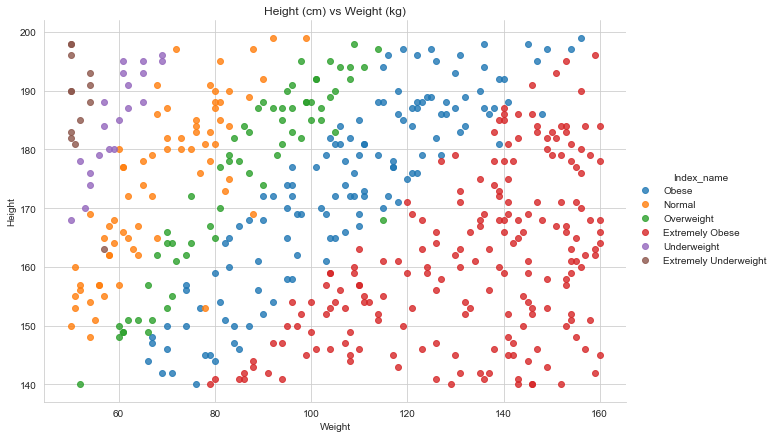

In [218]:
sns.lmplot('Weight', 'Height', df, hue='Index_name',fit_reg=False, size=6, aspect=1.5)
plt.title('Height (cm) vs Weight (kg)')

The 'Male' vs 'Female' comparison shows that the **female** sample has a tendency toward the **'Normal'** weight and the **male** sample has a tendency to the **'Extremely Obese'** and **'Underweight'** sides.

In [219]:
male_counts = df[df['Gender']=='Male']['Index_name'].value_counts()
female_counts = df[df['Gender']=='Female']['Index_name'].value_counts()

df_counts = pd.DataFrame({'Male': male_counts, 'Female': female_counts})
df_counts

,Male,Female
Extremely Obese,103,92
Extremely Underweight,6,7
Normal,28,41
Obese,58,70
Overweight,31,33
Underweight,13,7


<AxesSubplot:>

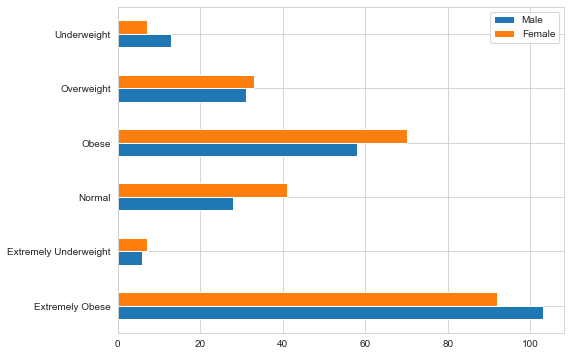

In [220]:
df_counts.plot(kind='barh', figsize=(8, 6))

In [221]:
male_percentages = round((df[df['Gender'] == 'Male']['Index_name'].value_counts() / df['Index_name'].value_counts())*100, 2)
female_percentages = round((df[df['Gender'] == 'Female']['Index_name'].value_counts() / df['Index_name'].value_counts())*100, 2)

result_df = pd.concat([male_percentages, female_percentages], axis=1)
result_df.columns = ['Male %', 'Female %']
result_df

,Male %,Female %
Extremely Obese,52.82,47.18
Extremely Underweight,46.15,53.85
Normal,40.58,59.42
Obese,45.31,54.69
Overweight,48.44,51.56
Underweight,65.00,35.00


<AxesSubplot:>

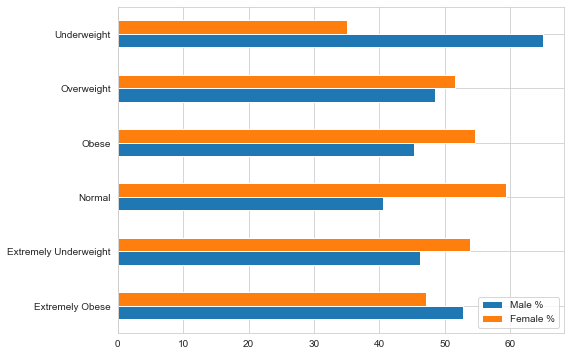

In [222]:
result_df.plot(kind='barh', figsize=(8, 6))